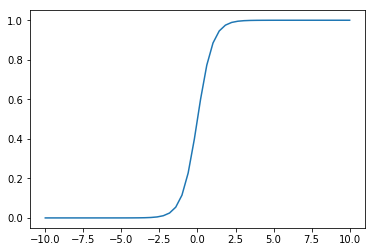

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10)
y = (np.tanh(x)+1)/2
#y = np.log(1+np.exp(x))

plt.plot(x,y)
plt.show()

In [31]:
class model():
 
    def __init__(self, input_size, output_size, layer_size,n_layers):
        
        #initialise random weights and biases
        self.weights = {}
        self.bias = {}
        self.layers = n_layers
        
        self.weights[0] = np.random.randn(input_size,layer_size)
        self.bias[0]    = np.random.randn(layer_size)
        
        if self.layers > 1:
            for i in range(1,self.layers):
                self.weights[i] = np.random.randn(layer_size,layer_size)
                self.bias[i]    = np.random.randn(layer_size)
                
        self.weights[self.layers] = np.random.randn(layer_size,output_size)
        self.bias[self.layers]    = np.random.randn(output_size)
        

def forward(data, model):
    
    n_layers = model.layers
    
    z = data
    for i in range(n_layers+1):
        
        a = np.dot(z,model.weights[i]) + model.bias[i]
        z = np.maximum(a,np.zeros(a.size)) #RelU
    
    result = (np.tanh(z)+1)/2  #Squeeze result between 0 and 1
    
    return result
        
def cost(data, true):
    
    fit = np.sum(np.sqrt((data-true)**2))
    
    return fit

#def back_propogation(m,out,true):
    

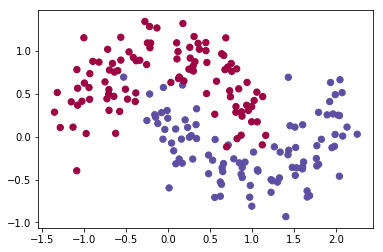

In [32]:
from sklearn.datasets import make_moons

np.random.seed(0)
X, y = make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [33]:
X = np.reshape(X,X.size)

data = X
true = y

layer_size = 5
n_layers = 2

m = model(data.size,true.size,layer_size,n_layers)

out = forward(data,m)

print(cost(out , true))

97.1488141797
